# MPR model in C++ 

In [1]:
import os
import numpy as np
import networkx as nx
from copy import deepcopy
from vbi import report_cfg
import matplotlib.pyplot as plt
from vbi.models.cpp.mpr import MPR_sde

In [2]:
seed = 2
np.random.seed(seed)

LABESSIZE = 14
plt.rcParams['axes.labelsize'] = LABESSIZE
plt.rcParams['xtick.labelsize'] = LABESSIZE
plt.rcParams['ytick.labelsize'] = LABESSIZE

In [13]:
nn = 6
weights = nx.to_numpy_array(nx.complete_graph(nn))
params = {
    "G": 0.22,
    "weights": weights,
    "t_end": 10000,
    "dt": 0.01,
    "tau": 1.0,
    "eta": -4.6,
    "rv_decimate": 10,  # in time steps
    "noise_amp": 0.037,
    "tr": 300.0,  # in [ms]
    "seed": 42,
    "RECORD_BOLD": True,
    "RECORD_RV": True
}

r.shape=(6, 9999)
r.shape=(6, 9999)
v.shape=(6, 9999)
rv_t.shape=(9999,)
bold_t.shape=(32,)
bold_d.shape=(6, 32)


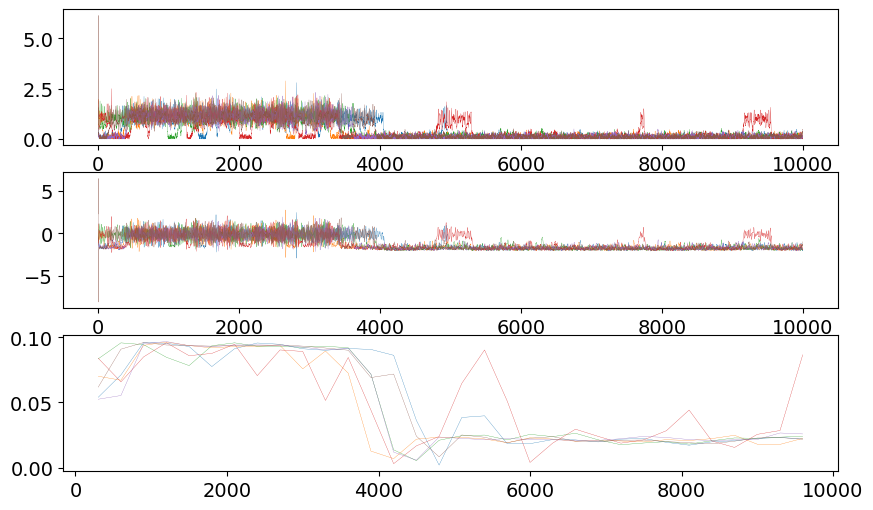

In [15]:

obj = MPR_sde(params)
sol = obj.run({"G": 0.25})

rv_t = sol["rv_t"]
rv_d = sol["rv_d"]
r = rv_d[:nn, :]
v = rv_d[nn:, :]
bold_t = sol["bold_t"]
bold_d = sol["bold_d"]

print(f"{r.shape=}")
print(f"{r.shape=}")
print(f"{v.shape=}")
print(f"{rv_t.shape=}")
print(f"{bold_t.shape=}")
print(f"{bold_d.shape=}")

fig, ax = plt.subplots(3, 1, figsize=(10, 6))
ax[0].plot(rv_t, r.T, lw=0.2);
ax[1].plot(rv_t, v.T, lw=0.2);
ax[2].plot(bold_t, bold_d.T, lw=0.2);
